In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
import plotly.io as pio
pio.renderers.default = "browser"

In [ ]:
### Loading data and taking descriptive statistics

In [4]:
### Import data into a pandas dataframe, note that the separator is a ';' instead of the typical ','
cars = pd.read_csv("~/Downloads/original cars.csv", sep=";")

In [6]:
### View the first 5 rows of the cars dataframe
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [7]:
### Gather summary statistics for each column
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
### We can create some more specialized metrics like a weighted mean MPG given Horsepower
print(np.mean(cars["MPG"]))
print(np.average(cars[["MPG"]], weights=cars[["Horsepower"]]))

23.051231527093602
20.667542169247973


In [10]:
### We can then create some visualizations to allow us to understand the various distributions of variables in our dataset
print(np.quantile(a =cars[['Horsepower']], q=[0.0,0.25,0.5,0.75,1.0]))
print(stats.iqr(cars[['Horsepower']]))

[  0.   75.   93.5 129.  230. ]
54.0


In [ ]:
### Aggregate views of the data

In [59]:
### Cross Tab
x_tab = pd.crosstab(cars['Model'], columns=cars['Origin'])
x_tab

Origin,Europe,Japan,US
Model,,,
70,6,2,27
71,5,4,20
72,5,5,18
73,7,4,29
74,6,6,15
75,6,4,20
76,8,4,22
77,4,6,18
78,6,8,22


In [93]:
x_tab2 = pd.crosstab(cars['Origin'], columns=cars['Cylinders'])
x_tab2

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [61]:
x_tab3 = pd.crosstab(cars['Origin'], columns=cars['MPG'])
x_tab3

MPG,0.0,9.0,10.0,11.0,12.0,13.0,14.0,14.5,15.0,15.5,...,39.4,40.8,40.9,41.5,43.1,43.4,44.0,44.3,44.6,46.6
Origin,,,,,,,,,,,,,,,,,,,,,
Europe,3,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,0,0
Japan,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
US,5,1,2,4,6,20,19,1,16,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Visualizing Distributions

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2c746f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2c1c7610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2c1c7c90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2c3d8ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2c746a50>],
 'means': []}

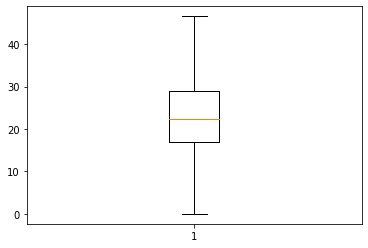

In [86]:
# Basic Box Plot
# Learn more at https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.boxplot(cars['MPG'])
# plt.show() - we don't need this in Jupyter but we do if we are working in another IDE

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2d1e5390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2c6f6bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2c5e78d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2d1e58d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2c9c1c50>],
 'means': []}

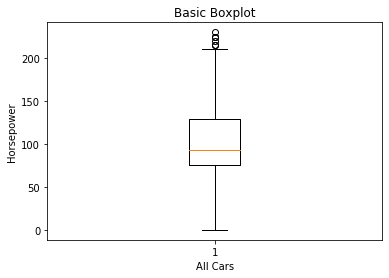

In [85]:
# More Sophisticated Boxplot
# Adding figure details and labels
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Boxplot')
ax1.set_ylabel('Horsepower')
ax1.set_xlabel('All Cars')
ax1.boxplot(cars['Horsepower'])

Text(0.5, 0, 'All Cars')

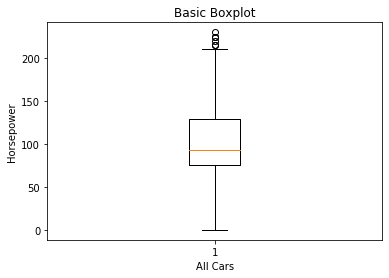

In [87]:
# More Sophisticated Boxplot
# Adding more encodings
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Boxplot')
ax1.boxplot(cars['Horsepower'])
ax1.set_ylabel('Horsepower')
ax1.set_xlabel('All Cars')

Text(0.5, 0, 'All Cars')

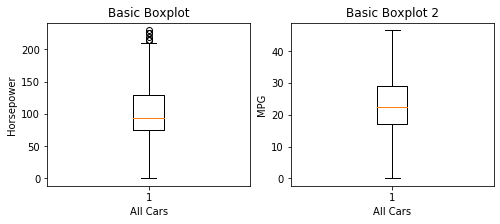

In [92]:
# Creating figures with more than one plot
fig1, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].set_title('Basic Boxplot')
axs[0].boxplot(cars['Horsepower'])
axs[0].set_ylabel('Horsepower')
axs[0].set_xlabel('All Cars')

axs[1].set_title('Basic Boxplot 2')
axs[1].boxplot(cars['MPG'])
axs[1].set_ylabel('MPG')
axs[1].set_xlabel('All Cars')

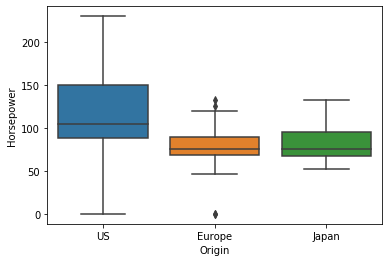

In [13]:
# Easily plot even more complex data using Seaborn
# Here we can include categorical variables automatically
# Learn more https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=cars['Origin'],
            y=cars['Horsepower'])

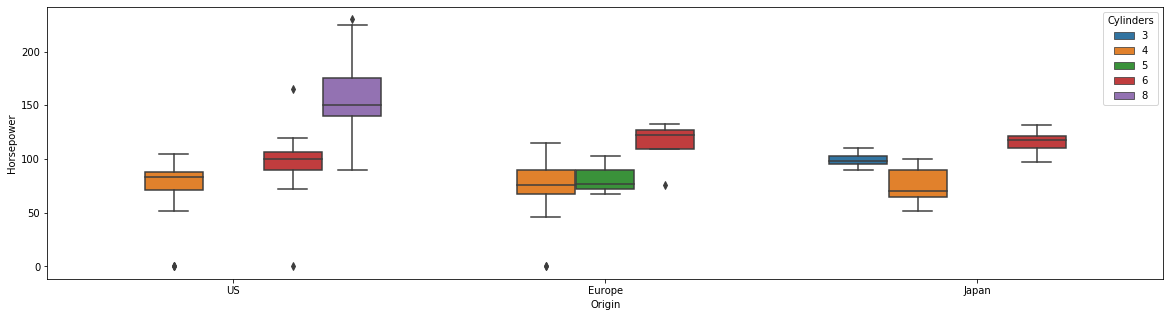

In [256]:
# Plot even more complex data using Seaborn
# Here we can include categorical variables
# Learn more https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(20, 5))
sns.boxplot(x=cars['Origin'],
            y=cars['Horsepower'],
            saturation=.75,
            hue=cars['Cylinders'],
            fliersize=5)

In [ ]:
### Frequency

406

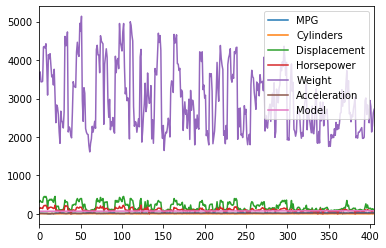

In [108]:
# Very basic auto-plotting with Pandas
# Learn More https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# What are we actually looking at here?
cars.plot()
len(cars)

(array([ 8.,  1., 32., 98., 77., 72., 61., 38., 13.,  6.]),
 array([ 0.  ,  4.66,  9.32, 13.98, 18.64, 23.3 , 27.96, 32.62, 37.28,
        41.94, 46.6 ]),
 <a list of 10 Patch objects>)

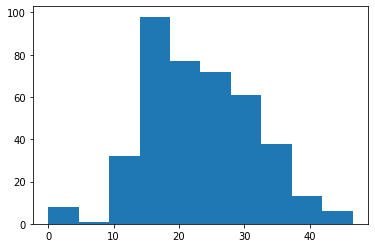

In [15]:
# Plot a histogram of counts of cars by MPG with 10 bins
plt.hist(cars['MPG'], 
         bins=10)

(array([0.00422842, 0.00052855, 0.01691368, 0.05179814, 0.04069853,
        0.03805577, 0.0322417 , 0.02008499, 0.00687118, 0.00317131]),
 array([ 0.  ,  4.66,  9.32, 13.98, 18.64, 23.3 , 27.96, 32.62, 37.28,
        41.94, 46.6 ]),
 <a list of 10 Patch objects>)

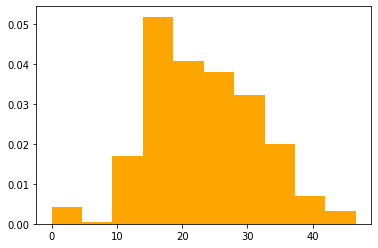

In [115]:
# Showing density instead of frequency
plt.hist(cars['MPG'],
         color = 'orange',
         bins=10, 
         density=True)

(array([0.00422842, 0.00052855, 0.01691368, 0.05179814, 0.04069853,
        0.03805577, 0.0322417 , 0.02008499, 0.00687118, 0.00317131]),
 array([ 0.  ,  4.66,  9.32, 13.98, 18.64, 23.3 , 27.96, 32.62, 37.28,
        41.94, 46.6 ]),
 <a list of 10 Patch objects>)

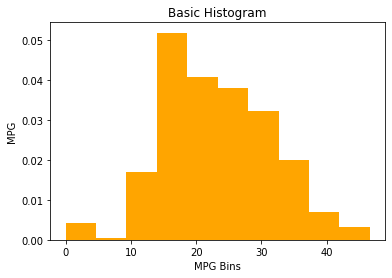

In [257]:
# More customization of the viz with Matplotlib
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Histogram')
ax1.set_ylabel('MPG')
ax1.set_xlabel('MPG Bins')
plt.hist(cars['MPG'],
         color = 'orange',
         bins=10, 
         density=True)

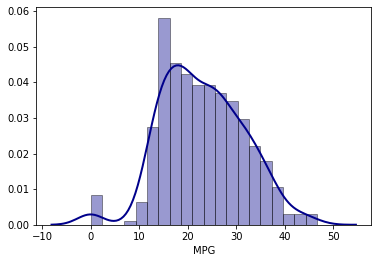

In [122]:
# Smooth density plots with Seaborn
# Seaborn gives us more fine-grained control
sns.distplot(cars['MPG'], 
             hist=True, 
             kde=True,
             bins=20, 
             color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [ ]:
### Bar Charts

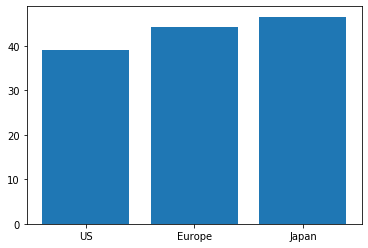

In [53]:
plt.bar(cars['Origin'], cars['MPG'])

In [ ]:
### Something looks a little odd with the chart above chart, think about what it is.
### ...
### We are plotting each car on top of each other for each origin, the data are not aggregated

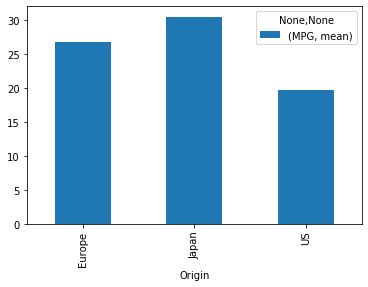

In [131]:
# So we want to be careful to use aggregation where appropriate
# Here it can also be easier to use the pandas default plotting
df = cars[['Origin', 'MPG']].groupby('Origin').agg(['mean']).plot.bar()

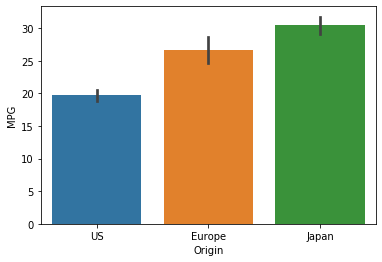

In [137]:
# Seaborn handles aggregation automatically
sns.barplot(x="Origin", 
            y="MPG",
            data=cars)

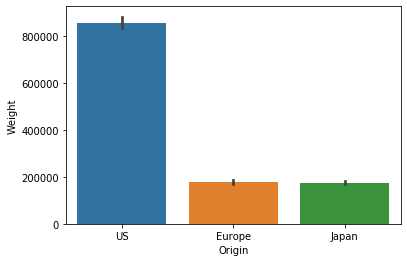

In [143]:
# Seaborn handles aggregation automatically
sns.barplot(x="Origin", 
            y="Weight",
            estimator=sum,
            data=cars)

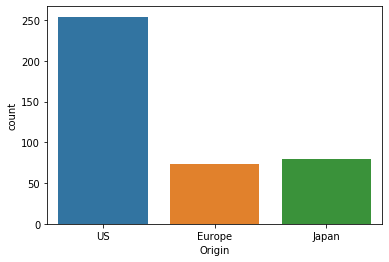

In [142]:
# Seaborn can also handle counts
sns.countplot(x="Origin",
            data=cars)

In [ ]:
### Scatter Plots

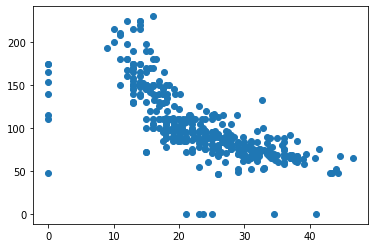

In [40]:
# Scatter plots work well with row level data
plt.scatter(cars['MPG'], 
            cars['Horsepower'])

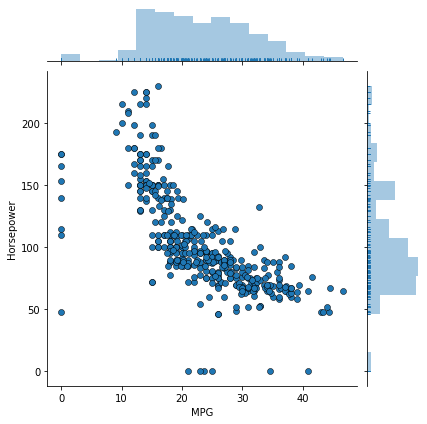

In [154]:
# Seaborn allows us to get more granular in our description of the visualization
# We can even pass keyword arguments down to the underlying plots
sns.jointplot(x="MPG", 
              y="Horsepower",
              edgecolor='black',
              linewidth=.5,
              marginal_kws=dict(bins=15, 
                                rug=True),
              data=cars)

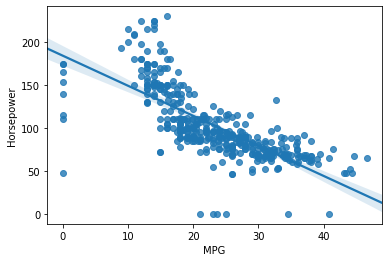

In [43]:
### Scatter with Curve Fitting with regplot
sns.regplot(cars['MPG'], 
            cars['Horsepower'])

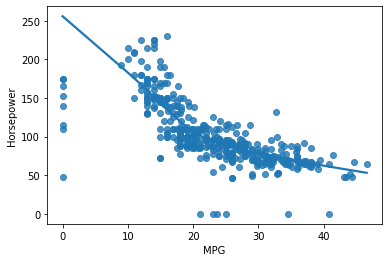

In [44]:
# Fitting with a more smooth curve using Lowess regression
sns.regplot(cars['MPG'], 
            cars['Horsepower'], 
            lowess=True)

In [ ]:
### Density

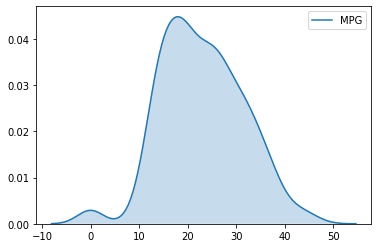

In [49]:
### Kernel Density Plot
sns.kdeplot(cars['MPG'], shade=True)

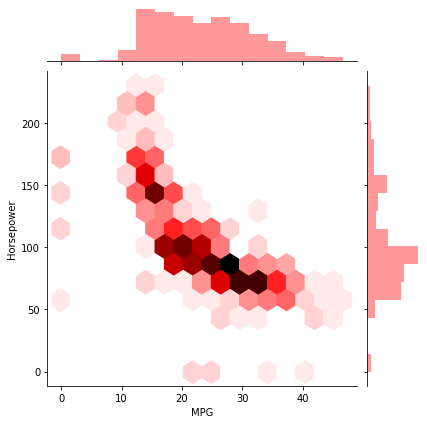

In [50]:
#2D Hexplot
sns.jointplot(x="MPG", 
              y="Horsepower", 
              data=cars, 
              kind='hex', 
              color='r')

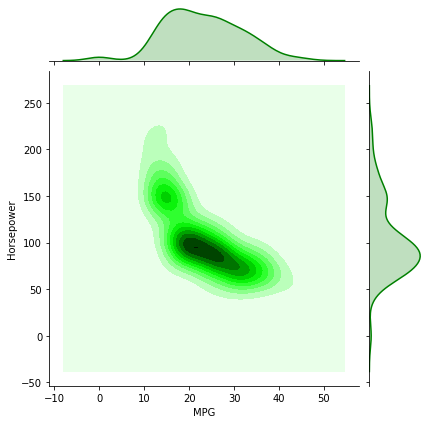

In [155]:
#2D KDEplot
sns.jointplot(x="MPG", 
              y="Horsepower", 
              data=cars, 
              kind='kde', 
              color='g')

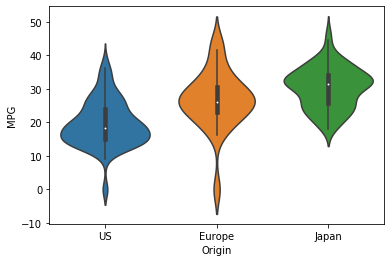

In [32]:
### Violin plot
sns.violinplot(cars['Origin'], 
               cars['MPG'], 
               shade=True)

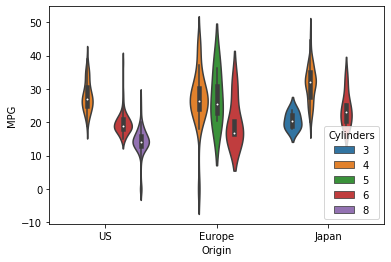

In [51]:
sns.violinplot(cars['Origin'], 
               cars['MPG'], 
               hue=cars['Cylinders'], 
               shade=True)

In [ ]:
### Working with Dates

In [162]:
### Import data into a pandas dataframe, note that the separator is a ';' instead of the typical ','
sup = pd.read_excel("~/Downloads/Sample - Superstore.xls",
                    parse_dates=['Order Date', 'Ship Date'])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [163]:
sup.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


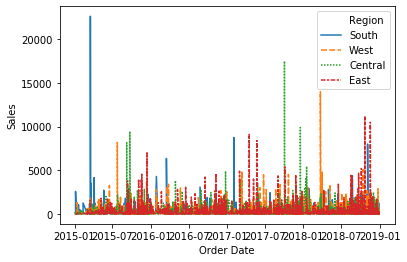

In [191]:
# This isn't very informative, why?
sns.lineplot(x="Order Date", 
             y="Sales",
             estimator=None,
             hue="Region", 
             style="Region",
             data=sup)

In [181]:
sup['Order Year'] =  pd.DatetimeIndex(sup['Order Date']).year

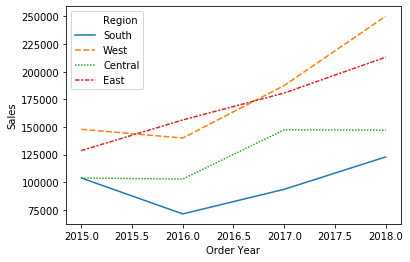

In [186]:
sns.lineplot(x="Order Year", 
             y="Sales",
             estimator=sum,
             ci=None,
             hue="Region", 
             style="Region",
             data=sup)

In [188]:
sup['Order Month'] = pd.DatetimeIndex(sup['Order Date']).month

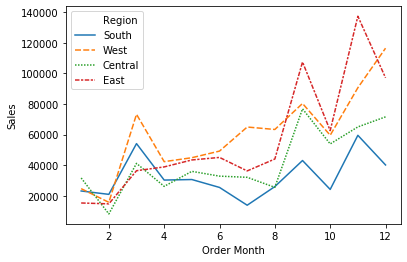

In [189]:
sns.lineplot(x="Order Month", 
             y="Sales",
             estimator=sum,
             ci=None,
             hue="Region", 
             style="Region",
             data=sup)

In [192]:
sup['Order Month/Year'] = sup['Order Date'].dt.strftime('%Y-%m')

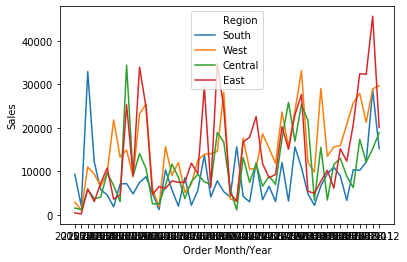

In [194]:
sns.lineplot(x="Order Month/Year", 
             y="Sales",
             estimator=sum,
             ci=None,
             hue="Region", 
             data=sup)

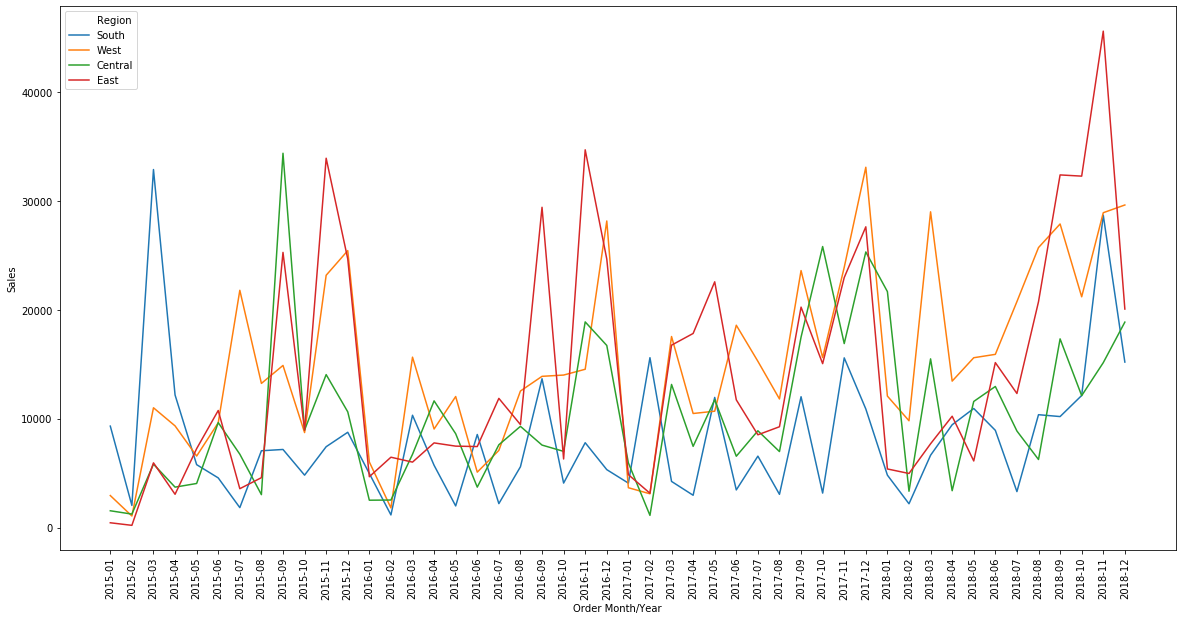

In [199]:
# We can call Matplotlib to add details to the figure
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.lineplot(x="Order Month/Year", 
             y="Sales",
             estimator=sum,
             ci=None,
             hue="Region", 
             data=sup)

In [52]:
### Interactivity in visualization

In [205]:
set(cars['Origin'])

{'Europe', 'Japan', 'US'}

In [244]:
# Bokeh
# https://docs.bokeh.org/en/latest/

# Mapping Colors and adding the map to the dataset
colormap = {'Japan': 'red', 'Europe': 'green', 'US': 'blue'}
colors = [colormap[x] for x in cars['Origin']]
cars['Color'] = colors

p = figure(title = "Cars MPG vs Weight")
p.xaxis.axis_label = 'Car Weight'
p.yaxis.axis_label = 'Car MPG'

p.circle(cars["Weight"], 
         cars["MPG"],
         color=cars['Color'], 
         fill_alpha=0.2, 
         size=10)

# We can save the output as an HTML document
# output_file("cars.html", title="cars.py example")

show(p)

In [245]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("Weight", "@Weight lbs"),
    ("MPG", "@MPG mpg"),
    ('desc', '@Car'),
])

p = figure(plot_width=900, 
           plot_height=900, 
           tools=[hover], 
           title="Auto MPG Data")
p.xaxis.axis_label = 'Car Weight'
p.yaxis.axis_label = 'Car MPG'

p.circle('Weight', 
         'MPG', 
         size=10,
         color='Color', 
         fill_alpha=0.2,
         legend = 'Origin',
         source=cars)

p.legend.location = "top_right"

# We can save the output as an HTML document
# output_file('test.html')
show(p)

In [238]:
# Plotly
# https://plotly.com/python/

# Load data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.Date), y=list(df.High)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)